<div style="text-align: center; font-size: 25px;">
    <span>
        <strong>[010412204101] - Khai thác dữ liệu</strong>
    </span><br>
    <span>
        <strong>Nguyễn Quốc Huy - 22H1120071 - CN22CLCC</strong>
    </span><br>
    <p>
        <strong>Bài tập 2.4</strong>
    </p>
</div>

<p style="font-size: 20px;">
        <strong>1. Nạp dự liệu iris vào bộ nhớ và hiển thị thông tin về số thuộc tính (dimensionality), số objects (size).</strong>

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Nạp dữ liệu Wine
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

# Hiển thị thông tin về dữ liệu
print("Dimensionality (số thuộc tính):", wine.data.shape[1])
print("Size (số objects):", wine.data.shape[0])
print(df.head(3))

Dimensionality (số thuộc tính): 13
Size (số objects): 178
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   

   od280/od315_of_diluted_wines  proline  target  
0                          3.92   1065.0       0  
1                          3.40   1050.0       0  
2                          3.17   1185.0       0  


<p style="font-size: 20px;">
        <strong>2. Đặt nhãn (label) cho dữ liệu đã nạp và hiển thị số lớp (classes)</strong>

In [2]:
# Lấy nhãn và tên thuộc tính
labels = wine.target_names
feature_names = wine.feature_names

# Hiển thị thông tin
print('Number of Classes: {}'.format(len(labels)))  # Số lớp
print('Classes (Labels):', labels)                 # Tên các lớp
print('Number of Features: {}'.format(len(feature_names)))  # Số thuộc tính
print('Feature Names:', feature_names)             # Tên các thuộc tính

Number of Classes: 3
Classes (Labels): ['class_0' 'class_1' 'class_2']
Number of Features: 13
Feature Names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


<p style="font-size: 20px;">
        <strong>3. Tách dữ liệu thành hai phần: training data(70%) và test data (30%)</strong>

In [3]:
# Tách dữ liệu thành features (X) và labels (Y)
X = df[wine.feature_names]
Y = df['target']

# Chia dữ liệu thành training data (70%) và test data (30%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, train_size=0.7, test_size=0.3)

# Hiển thị kích thước của các tập dữ liệu
print("Training data (X_train, Y_train):", X_train.shape, Y_train.shape)
print("Test data (X_test, Y_test):", X_test.shape, Y_test.shape)

# Hiển thị
print("\nX_train (first 3 rows):")
print(X_train.head(3))

print("\n\nX_test (first 3 rows):")
print(X_test.head(3))


Training data (X_train, Y_train): (124, 13) (124,)
Test data (X_test, Y_test): (54, 13) (54,)

X_train (first 3 rows):
     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
22     13.71        1.86  2.36               16.6      101.0           2.61   
108    12.22        1.29  1.94               19.0       92.0           2.36   
175    13.27        4.28  2.26               20.0      120.0           1.59   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
22         2.88                  0.27             1.69              3.8  1.11   
108        2.04                  0.39             2.08              2.7  0.86   
175        0.69                  0.43             1.35             10.2  0.59   

     od280/od315_of_diluted_wines  proline  
22                           4.00   1035.0  
108                          3.02    312.0  
175                          1.56    835.0  


X_test (first 3 rows):
     alcohol  malic_acid   ash  al

<p style="font-size: 20px;">
        <strong>4. Chuẩn hóa dữ liệu với StandardScaler</strong>

In [4]:
# Chuẩn hóa dữ liệu với StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)       

# Hiển thị 
print("X_train (first 3 rows after scaling):")
print(X_train[0:3, :])

print("\nX_test (first 3 rows after scaling):")
print(X_test[0:3, :])

X_train (first 3 rows after scaling):
[[ 0.91083058 -0.46259897 -0.01142613 -0.82067872  0.06241693  0.58820446
   0.93565436 -0.7619138   0.13007174 -0.51238741  0.65706596  1.94354495
   0.93700997]
 [-0.95609928 -0.96608672 -1.53725357 -0.14748691 -0.55401928  0.16998569
   0.07243241  0.20791318  0.78462633 -0.98210744 -0.40859506  0.58118003
  -1.41336684]
 [ 0.35952243  1.67501572 -0.37471838  0.13300967  1.36378226 -1.11812811
  -1.31488858  0.53118883 -0.44056558  2.22052913 -1.55950896 -1.44846566
   0.28683658]]

X_test (first 3 rows after scaling):
[[ 0.94841977 -0.63042822 -0.4110476  -0.87677804  1.22679643  0.57147571
   0.95620726 -1.24682729  0.01258759  0.36299992 -0.15283642  0.83141032
   1.01828164]
 [-0.24190464  0.25288364  0.42452457  0.69400284  0.81583896 -1.30214437
  -0.62636631 -1.00437054 -0.59161664  2.47674005 -2.02839981 -1.57358081
  -0.86722119]
 [-0.76815332 -1.10741662 -0.73801062 -0.14748691 -0.89648384  2.07706327
   1.16173629 -1.40846512  0.43217

<p style="font-size: 20px;">
        <strong>5. Tạo và huấn luyện mô hình với training data</strong>

In [5]:
# Huấn luyện mô hình
clf = DecisionTreeClassifier(max_depth=3, random_state=0)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

<p style="font-size: 20px;">
        <strong>6. Test và đánh giá độ chính xác của mô mình, yêu cầu hiển thị ma trận confusion matrix, accuracy, f-score</strong>

In [6]:
# Kiểm thửa mô hình
Y_predict = clf.predict(X_test)
Y_true = Y_test.values

# Ma trận confusion
print("\nConfusion Matrix:")
print(confusion_matrix(Y_true, Y_predict))

# Accuracy và F1-score
accuracy = accuracy_score(Y_true, Y_predict)
f1 = f1_score(Y_true, Y_predict, average=None)
print("\nAccuracy:", accuracy)
print("F1-score (per class):", f1)



Confusion Matrix:
[[17  2  0]
 [ 0 21  1]
 [ 0  0 13]]

Accuracy: 0.9444444444444444
F1-score (per class): [0.94444444 0.93333333 0.96296296]


<p style="font-size: 20px;">
        <strong>7. Trực quan hóa cây quyết định</strong>


Decision Tree Rules:

|--- color_intensity <= -0.50
|   |--- proline <= 0.83
|   |   |--- ash <= 2.31
|   |   |   |--- class: 1
|   |   |--- ash >  2.31
|   |   |   |--- class: 0
|   |--- proline >  0.83
|   |   |--- class: 0
|--- color_intensity >  -0.50
|   |--- flavanoids <= -0.40
|   |   |--- class: 2
|   |--- flavanoids >  -0.40
|   |   |--- proline <= -0.03
|   |   |   |--- class: 1
|   |   |--- proline >  -0.03
|   |   |   |--- class: 0



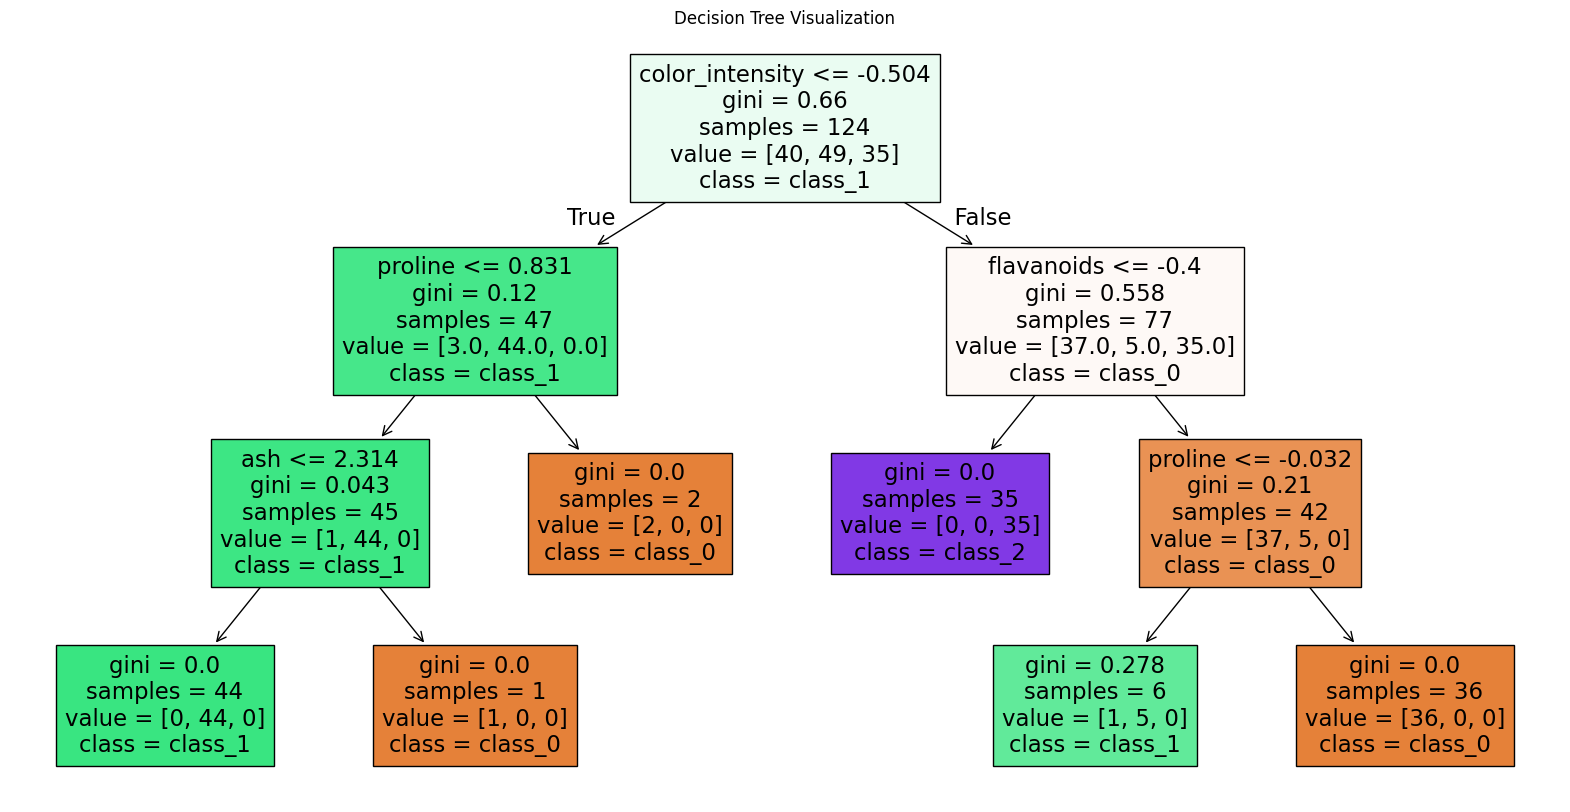

In [7]:
# Trực quan hóa cây quyết định
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import matplotlib.pyplot as plt
print("\nDecision Tree Rules:\n")
print(export_text(clf, feature_names=list(wine.feature_names)))
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=wine.feature_names, class_names=wine.target_names, filled=True)
plt.title("Decision Tree Visualization")
plt.show()


<p style="font-size: 20px;">
        <strong>8. Thử điều chỉnh các tham số của cây quyết định và chọn tham số cho kết quả là giá trị f-score tốt nhất.</strong>

In [8]:
# Tìm tham số tối ưu
best_f1 = 0
best_params = None

for max_depth in range(1, 10):
    for min_samples_split in range(2, 10):
        clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, random_state=0)
        clf.fit(X_train, Y_train)
        Y_predict = clf.predict(X_test)
        f1 = f1_score(Y_test, Y_predict, average='weighted')
        
        if f1 > best_f1:
            best_f1 = f1
            best_params = (max_depth, min_samples_split)

print("\nBest F1-score:", best_f1)
print("Best Parameters: max_depth =", best_params[0], ", min_samples_split =", best_params[1])


Best F1-score: 0.9443758573388202
Best Parameters: max_depth = 3 , min_samples_split = 2
